<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-with-pytorch?scriptVersionId=169587192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**This notebook about computer vision models with PyTorch**

In [1]:
import torch
import torchvision
torch.cuda.is_available()

True

**Working with tensors**

In [2]:
# define tensor wit default data type
x = torch.ones (2, 2)
print (x)
print (x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


In [3]:
# specify data type
x = torch.ones (2, 2, dtype = torch.int8)
print (x)
print (x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


In [4]:
# change tensor data type
x = torch.ones (1, dtype = torch.uint8)

print (x.dtype)

x = x.type (torch.float)
print (x.dtype)

torch.uint8
torch.float32


In [5]:
# converting tensors to NumPy arrays
x = torch.rand (2, 2)
print (x)
print (x.dtype)

y = x.numpy ()
print (y)
print (y.dtype)

tensor([[0.1186, 0.4280],
        [0.1011, 0.1817]])
torch.float32
[[0.11856306 0.42796612]
 [0.10109413 0.18167049]]
float32


In [6]:
# converting NumPy arrays to tensors
import numpy as np

x = np.zeros ((2, 2), dtype = np.float32)
print (x)
print (x.dtype)

y = torch.from_numpy (x)
print (x)
print (y.dtype)

[[0. 0.]
 [0. 0.]]
float32
[[0. 0.]
 [0. 0.]]
torch.float32


In [7]:
# move tensors between devices

# define a tensor
x = torch.tensor ([1.5, 2])
print (x)
print (x.device)

tensor([1.5000, 2.0000])
cpu


In [8]:
# move tensor onto GPU
device = torch.device ("cuda:0")
x = x.to (device)
print (x)
print (x.device)

tensor([1.5000, 2.0000], device='cuda:0')
cuda:0


In [9]:
# move tensor onto cpu
device = torch.device ('cpu')
x = x.to (device)
print (x)
print (x.device)

tensor([1.5000, 2.0000])
cpu


**Loading and processing data from PyTorch datasets - get the FashionMNIST dataset, it's not overused as MNIST**
https://github.com/zalandoresearch/fashion-mnist

In [10]:
from torchvision import datasets

path2data = 'FashionMNIST/raw/train-images-idx3-ubyte'

train_data = torchvision.datasets.FashionMNIST(path2data, train = True, download=True)

x_train, y_train = train_data.data, train_data.targets
print (x_train.shape)
print (y_train.shape)

val_data = torchvision.datasets.FashionMNIST(path2data, train = False, download=True)
x_val, y_val = val_data.data, val_data.targets
print (x_val.shape)
print (y_val.shape)


100%|██████████| 26421880/26421880 [00:01<00:00, 13880272.07it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 297073.97it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5563374.63it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10385895.62it/s]

Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


**Display images**

torch.Size([60000, 1, 28, 28])
torch.Size([3, 212, 242])


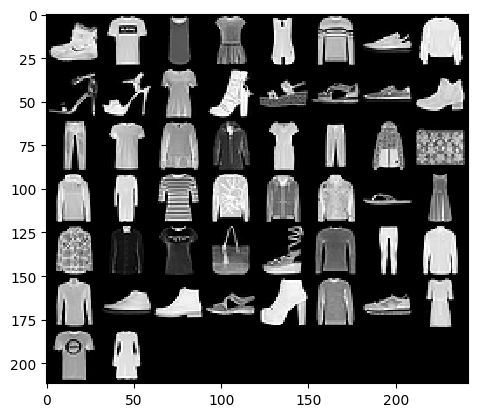

In [11]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# adding a dimension to tensor to become B*C*H*H
if len (x_train.shape) == 3:
    x_train = x_train.unsqueeze (1)
print (x_train.shape)

if len(x_val.shape) == 3:
    x_val = x_val.unsqueeze (1)
    
# make a grid of 50 images, 8 images per row
x_grid = utils.make_grid (x_train[:50], nrow = 8, padding = 2)
print (x_grid.shape)

# function to display images
def show (img):
    # convert tensor to numpy array
    npimg = img.numpy ()
    
    # convert to H*W*C shape
    npimg_tr = np.transpose (npimg, (1, 2, 0))
    
    # display images
    plt.imshow (npimg_tr, interpolation = 'nearest')
    
# call function for display images
show (x_grid)

**Data transformation**

Text(0.5, 1.0, 'transformed')

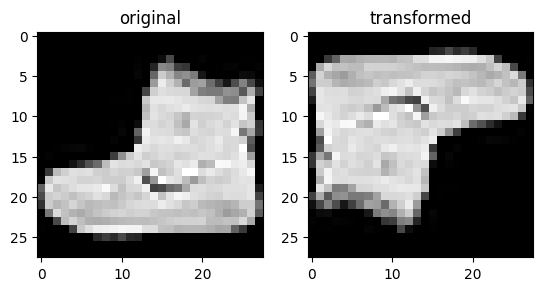

In [12]:
from torchvision import transforms

# loading FashionMNIST training dataset
train_data = torchvision.datasets.FashionMNIST(path2data, train = True, download=True)

# define transformations
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=1),
                                    transforms.RandomVerticalFlip(p=1),
                                    transforms.ToTensor(),
                                    ])

# get a sample image from training dataset
img = train_data[0][0]

# tranform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap = "gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap = "gray");
plt.title("transformed")

In [13]:
# define transformations
data_transform = transforms.Compose([
                                        transforms.RandomHorizontalFlip(1),
                                        transforms.RandomVerticalFlip(1),
                                        transforms.ToTensor(),])

# Loading MNIST training data with on-the-fly transformations
train_data = torchvision.datasets.FashionMNIST(path2data, train = True, download = True,
transform = data_transform )

# wrap tensors into a dataset
from torch.utils.data import TensorDataset

train_ds = TensorDataset (x_train, y_train)
val_ds = TensorDataset (x_val, y_val)

for x, y in train_ds:
    print (x.shape, y.item ())
    break

torch.Size([1, 28, 28]) 9


In [14]:
# iterate over dataset
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader (train_ds, batch_size = 8)
val_dl = DataLoader (val_ds, batch_size = 8)

# iterate over batches
for xb, yb in train_dl:
    print (xb.shape)
    print (yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])


**Building the models**

In [15]:
from torch import nn

# input tensor dimension 64*1000
input_tensor = torch.randn (64, 1000)

# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear (1000, 100)

# output of the linear layer 
output = linear_layer (input_tensor)
print (output.size ())

torch.Size([64, 100])


In [16]:
# define models using nn.Sequential

from torch import nn

# define a two layer model
model = nn.Sequential (nn.Linear (4, 5),
                      nn.ReLU (), # ReLU is not shown in the figure.
                      nn.Linear (5, 1),)
print (model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [17]:
# define models using nn.Module

import torch.nn.functional as F

class Net (nn.Module):
    def __init__ (self):
        super (Net, self).__init__()
        self.conv1 = nn.Conv2d (1, 8, 5, 1)
        self.conv2 = nn.Conv2d (8, 16, 5, 1)
        self.fc1 = nn.Linear (4*4*16, 100)
        self.fc2 = nn.Linear (100, 10)
        
    def forward (self, x):
        x = F.relu (self.conv1 (x))
        x = F.max_pool2d (x, 2, 2)
        x = F.relu (self.conv2 (x))
        x = F.max_pool2d (x, 2, 2)
        x = x.view (-1, 4*4*16)
        x = F.relu (self.fc1 (x))
        x = self.fc2 (x)
        return F.log_softmax (x, dim = 1)
    
model = Net ()
print (model)
    

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
# move model to device
device = torch.device ('cuda:0')
model.to(device)
print (next (model.parameters ()).device)

cuda:0


In [19]:
# show model summary
!pip install torchsummary
from torchsummary import summary

summary (model, input_size = (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
            Linear-4                   [-1, 10]           1,010
Total params: 30,134
Trainable params: 30,134
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


In [20]:
# define the negative log likelihood loss
loss_func = nn.NLLLoss (reduction = "sum")

for xb, yb in train_dl:
    # move batch to cuda device
    xb = xb.type (torch.float).to(device)
    yb = yb.to(device)
    
    # get model output
    out = model (xb)
    
    # calculate loss value
    loss = loss_func (out, yb)
    print (loss.item ())
    break
    
# compute gradients 
loss.backward ()

71.91056060791016


In [21]:
from torch import optim

# define Adam optimizer
opt = optim.Adam (model.parameters (), lr = 1e-4)

# update model parameters
opt.step ()

# set gradients to zero
opt.zero_grad ()

# training and validation
def metrics_batch (target, output):
    # obtain output class
    pred = output.argmax (dim = 1, keepdim = True)
    
    # compare output class with target class
    corrects = pred.eq (target.view_as (pred)).sum().item()
    return corrects

def loss_batch (loss_func, xb, yb, yb_h, opt = None):
    # obtain loss
    loss = loss_func (yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch (yb, yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad ()
        
    return loss.item (), metric_b

def loss_epoch (model, loss_func, dataset_dl, opt = None):
    loss = 0.0
    metric = 0.0
    len_data = len (dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb.type (torch.float).to(device)
        yb = yb.to(device)
        
        # obtain model output
        yb_h = model (xb)
        
        loss_b, metric_b = loss_batch (loss_func, xb, yb, yb_h, opt)
        loss += loss_b
        if metric_b is not None:
            metric += metric_b
    loss/=len_data
    metric/=len_data
    return loss, metric

def train_val (epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range (epochs):
        model.train ()
        train_loss, train_metric = loss_epoch (model, loss_func, train_dl, opt)
        
        model.eval ()
        with torch.no_grad ():
            val_loss, val_metric = loss_epoch (model, loss_func, val_dl)
            
        accuracy = 100*val_metric
        print ("epoch: %d, train loss: %.6f, val_loss: %.6f, accuracy: %.2f" %(epoch, train_loss, val_loss, accuracy))
        
# call train_val function
num_epochs = 5
train_val (num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.593107, val_loss: 0.474404, accuracy: 83.44
epoch: 1, train loss: 0.402778, val_loss: 0.412225, accuracy: 85.19
epoch: 2, train loss: 0.350538, val_loss: 0.386477, accuracy: 86.51
epoch: 3, train loss: 0.316981, val_loss: 0.375235, accuracy: 86.95
epoch: 4, train loss: 0.291774, val_loss: 0.374358, accuracy: 87.15
